In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv


In [2]:
df = pd.read_csv('/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv')
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [3]:
df.shape

(3900, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [6]:
Item_Purchased=df['Item Purchased'].value_counts().reset_index()
Item_Purchased

,Item Purchased,count
0,Blouse,171
1,Jewelry,171
2,Pants,171
3,Shirt,169
4,Dress,166
5,Sweater,164
6,Jacket,163
7,Belt,161
8,Sunglasses,161
9,Coat,161


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
item = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
item

,Item Purchased,Purchase Amount (USD)
0,Backpack,8636
1,Belt,9635
2,Blouse,10410
3,Boots,9018
4,Coat,9275
5,Dress,10320
6,Gloves,8477
7,Handbag,8857
8,Hat,9375
9,Hoodie,8767


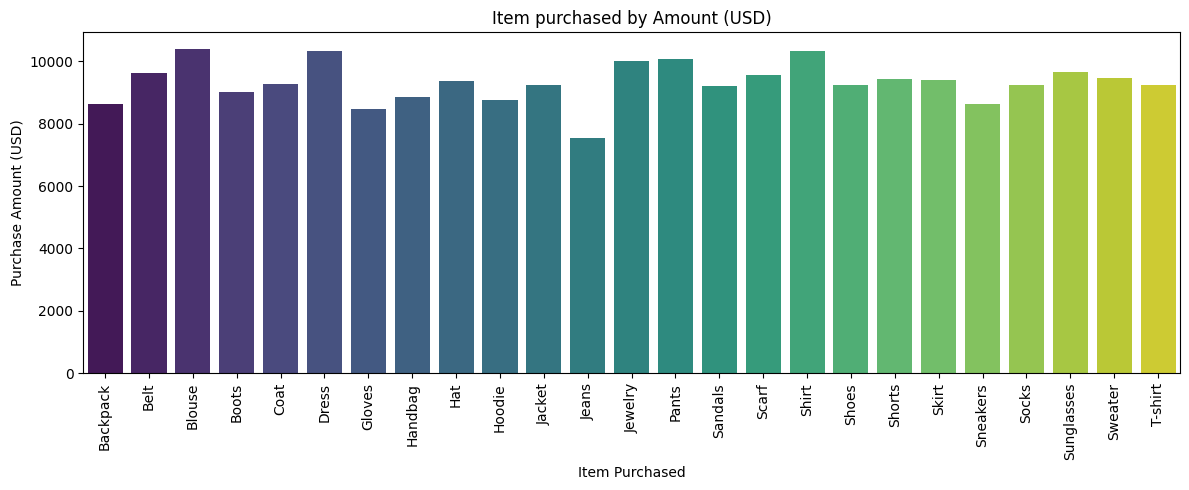

In [9]:
plt.figure(figsize=(12, 5))
sns.barplot(
    data=item,
    x='Item Purchased',
    y='Purchase Amount (USD)',
    palette='viridis')
plt.title('Item purchased by Amount (USD)')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


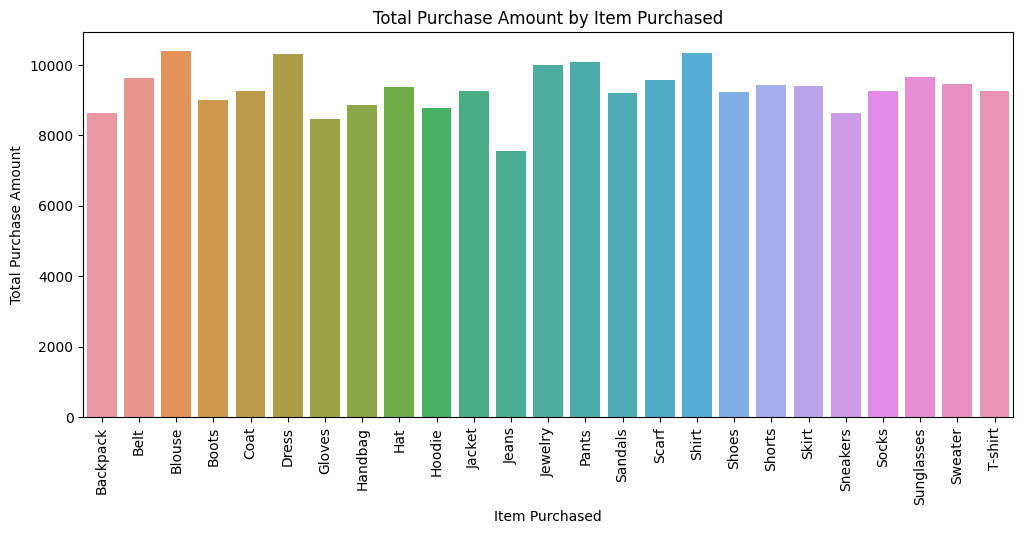

In [10]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', data=item)
plt.xticks(rotation=90)
plt.xlabel('Item Purchased')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Item Purchased')
plt.show()

In [11]:
colors = {'background': '#FFFFFF','plot_bgcolor': '#F0F0F0'}

In [12]:
Numbers_Category = df['Category'].value_counts().head()
Numbers_Category

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [13]:
Numbers_Category_pie = px.pie(names=Numbers_Category.index,values=Numbers_Category,color_discrete_sequence=px.colors.qualitative.Set2_r,
                     title='Numbers of Categorys')
Numbers_Category_pie.update_traces(pull=[0.07,0,0,0,0])
Numbers_Category_pie.update_layout(paper_bgcolor=colors['background'],plot_bgcolor = colors['plot_bgcolor'],title_x=0.5)

In [14]:
df['Color'].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [16]:
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

In [17]:
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100.0 * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

In [18]:
counts = df['Gender'].value_counts()

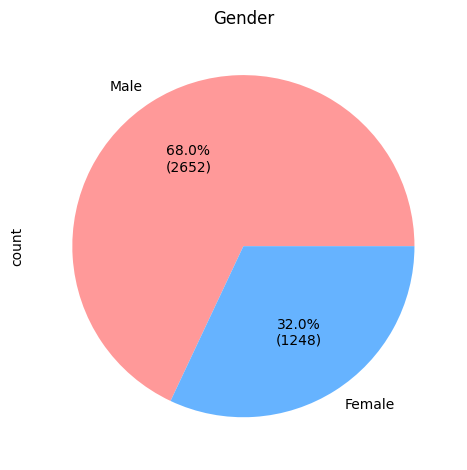

In [19]:
counts.plot(kind='pie',autopct=lambda pct: autopct_format(pct, counts),colors=colors)
plt.title('Gender')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



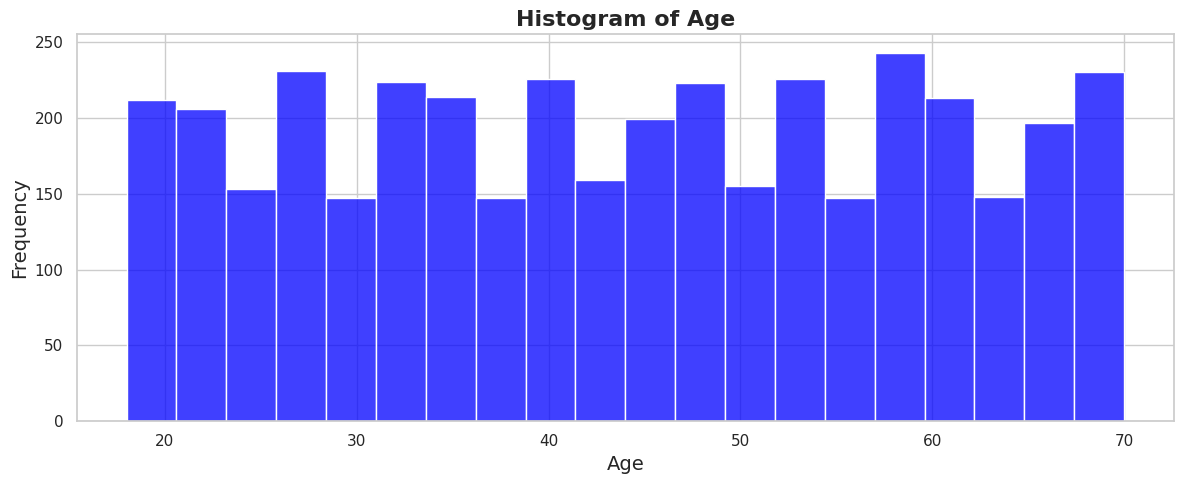

In [20]:
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")
sns.histplot(data=df, x='Age', color='blue', bins=20, kde=False)
plt.title('Histogram of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

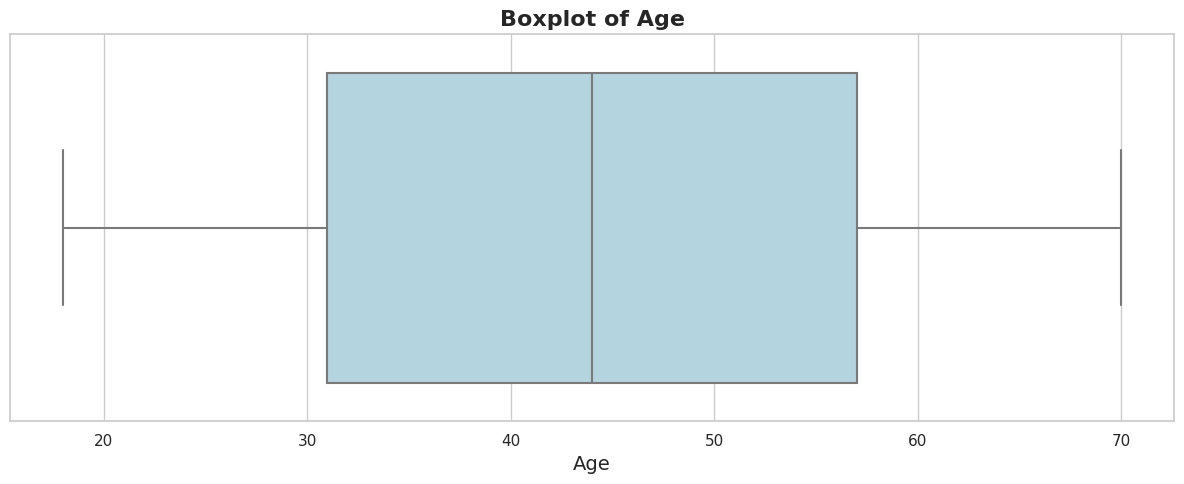

In [21]:
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")
sns.boxplot(x=df['Age'], color='lightblue')
plt.title('Boxplot of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)

plt.tight_layout()
plt.show()